# SLO Twitter Data Analysis:

### Written By: Professor Keith VanderLinden and Joseph Jinn

<span style="font-family:Papyrus; font-size:1.25em;">
    
Note: Using a subset of the entire JSON file for time-saving testing purposes.<br><br>  

</p>It seems the original "SLO analysis.ipynb" utilizes multiple JSON files that are already auto-encoded to be associated with certain SLO mining companies.  I don't have access to those JSON files, so I am currently just using the "dataset_slo_20100101-20180510.json" raw Tweet file and the "dataset_20100101-20180510.csv" processed Tweet file from the "sloclassifiers" directory on Borg.</p></br>

This analysis is based on and adapted from "SLO analysis.ipynb" by Shuntary Yada from CSIRO.<br>

</span>

## Sample from raw JSON Twitter Dataset:

<span style="font-family:Papyrus; font-size:1.25em;">

The raw Tweet in JSON format is in Dictionary format as key/value pairs.<br>
There are sometimes nested data structures such as a String key and then a List as the value, containing various elements.<br>
Each line within the JSON file corresponds to a single Tweet.<br>

</span>

<span style="font-family:Papyrus; font-size:1.25em;">
    
{"in_reply_to_status_id_str":"305159434462691328","in_reply_to_status_id":305159434462691328,"coordinates":null,

"created_at":"Sat Feb 23 03:40:21 +0000 2013","truncated":false,"in_reply_to_user_id_str":"2768501",

"source":"<a href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\">Twitter for iPhone<\/a>",

"retweet_count":0,"retweeted":false,"geo":null,"in_reply_to_screen_name":"abcnews","is_quote_status":false,

"entities":{"urls":[],"hashtags":[],"user_mentions":[{"indices":[0,8],"screen_name":"abcnews","id_str":"2768501",

"name":"ABC News","id":2768501}],"symbols":[]},"full_text":"@abcnews About bloody time. Adani only wants FIFO Indian

workers for his Bowen basin mines.","id_str":"305160140833816576","in_reply_to_user_id":2768501,

"display_text_range":[0,91],"favorite_count":0,"id":305160140833816576,"place":null,"contributors":null,

"lang":"en","user":{"utc_offset":36000,"friends_count":1385,"profile_image_url_https":

"https:\/\/pbs.twimg.com\/profile_images\/698290934618787840\/SIpBKnWE_normal.jpg","listed_count":3,

"profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","default_profile_image":false,

"favourites_count":533,"description":"Train Driver extraordinaire, proud Union Leftie and Labor supporter.

Cant stand the LNP and their regressive ideas. Mainly political but I do enjoy a laugh.",

"created_at":"Tue Aug 21 23:23:52 +0000 2012","is_translator":false,

"profile_background_image_url_https":"https:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","protected":false,

"screen_name":"DazzDicko","id_str":"772466924","profile_link_color":"1DA1F2","is_translation_enabled":false,

"translator_type":"none","id":772466924,"geo_enabled":true,"profile_background_color":"C0DEED","lang":"en",

"has_extended_profile":false,"profile_sidebar_border_color":"C0DEED","profile_text_color":"333333","verified":false,

"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/698290934618787840\/SIpBKnWE_normal.jpg",

"time_zone":"Australia\/Brisbane","url":null,"contributors_enabled":false,"profile_background_tile":false,

"entities":{"description":{"urls":[]}},"statuses_count":5176,"follow_request_sent":false,"followers_count":945,

"profile_use_background_image":true,"default_profile":true,"following":false,"name":"Daryl Dickson",

"location":"Far North Queensland","profile_sidebar_fill_color":"DDEEF6","notifications":false},"favorited":false}

</span>

<span style="font-family:Papyrus; font-size:1.25em;">

Sample obtained by copy/pasting a single line from the raw JSON file and then manually separating that single line into multiple lines.<br>

</span>

## Import libraries and set parameters:

In [1]:
import logging as log
import warnings
import tensorflow as tf
import time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('precision', 7)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


<span style="font-family:Papyrus; font-size:1.25em;">

Pandas settings alters the maximum number of rows to be displayed and the number of decimal places to display for floating point values.<br>

We also filter out several warning types to reduce output clutter.<br>

</span>

In [3]:
log.basicConfig(level=log.DEBUG)
# tf.logging.set_verbosity(tf.logging.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Change log levels between "INFO" and "DEBUG" depending on whether you wish to see log output or not.<br>

</span>

## Import raw JSON file and break into chunks:

<span style="font-family:Papyrus; font-size:1.25em;">

We read in the JSON file as chunks as it is a large file approximately 3.6 GBS in size and will not fit in RAM otherwise.  We currently read in only the first two chunks and perform data analysis on them.  The counter variable controls the # of chunks we read in and we have set the chunk size to 1000 Tweets per chunk.<br>

</span>

In [4]:
# Read in the JSON file.
# twitter_data = pd.read_json("json/dataset_slo_20100101-20180510.json",
#                             orient='records',
#                             lines=True,
#                             chunksize=1000)

twitter_data = pd.read_json("D:/Dropbox/summer-research-2019/json/dataset_slo_20100101-20180510.json",
                            orient='records',
                            lines=True,
                            chunksize=1000)

# Create a empty Pandas dataframe.
twitter_dataframe = pd.DataFrame()

# Consider only subset of entire JSON fire for testing purposes.
counter = 0
for data in twitter_data:
    twitter_dataframe = twitter_dataframe.append(data, ignore_index=True)
    counter += 1
    if counter >= 2:
        break

# Print shape and column names.
log.debug("\n")
log.debug("The shape of the twitter dataframe:")
log.debug(twitter_dataframe.shape)
log.debug("\n")
log.debug("The columns of the twitter dataframe:")
log.debug(twitter_dataframe.columns)
log.debug("\n")
log.debug("A sample of the twitter dataframe:")
log.debug(twitter_dataframe.sample(1))
log.debug("\n")

DEBUG:root:

DEBUG:root:The shape of the twitter dataframe:
DEBUG:root:(2000, 27)
DEBUG:root:

DEBUG:root:The columns of the twitter dataframe:
DEBUG:root:Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')
DEBUG:root:

DEBUG:root:A sample of the twitter dataframe:
DEBUG:root:     contributors coordinates          created_at display_text_range  \
840           NaN        None 2014-06-20 01:40:58           [0, 114]   

                                              entities  \
840  {'urls': [], 'hashtags': [], 'media': [{'displ...   

    

## Import Twitter dataset CSV file:

<span style="font-family:Papyrus; font-size:1.25em;">

We read in the untokenized Twitter dataset as a CSV file and generate a Pandas dataframe from the dataset.<br>

</span>

In [5]:
# Read in the CSV file.
# tweet_dataset_processed = \
#     pd.read_csv("datasets/dataset_20100101-20180510.csv", sep=",")

tweet_dataset_processed = \
    pd.read_csv("D:/Dropbox/summer-research-2019/datasets/dataset_20100101-20180510.csv", sep=",")

# Reindex and shuffle the data randomly.
tweet_dataset_processed = tweet_dataset_processed.reindex(
    pd.np.random.permutation(tweet_dataset_processed.index))

# Generate a Pandas dataframe.
tweet_dataframe_processed = pd.DataFrame(tweet_dataset_processed)

# Print shape and column names.
log.debug("\n")
log.debug("The shape of our SLO tweet dataframe:")
log.debug(tweet_dataframe_processed.shape)
log.debug("\n")
log.debug("The columns of our SLO tweet dataframe:")
log.debug(tweet_dataframe_processed.columns)
log.debug("\n")
log.debug("A sample from the tweet dataframe:")
log.debug(tweet_dataframe_processed.sample(10))
log.debug("\n")

DEBUG:root:

DEBUG:root:The shape of our SLO tweet dataframe:
DEBUG:root:(658982, 9)
DEBUG:root:

DEBUG:root:The columns of our SLO tweet dataframe:
DEBUG:root:Index(['id', 'lang', 'language_textblob', 'retweeted', 'hashtags', 'company',
       'text', 'user_screen_name', 'user_description'],
      dtype='object')
DEBUG:root:

DEBUG:root:A sample from the tweet dataframe:
DEBUG:root:                        id lang language_textblob  retweeted  \
311535  930729153296347137   en                en       True   
80120   846569186469957633   en                en      False   
576074  731039787776393216   es                en      False   
530588  826422015447822336   en                en       True   
425479  991851048435204096   en                en       True   
563060  688553637988061184   en                en       True   
475858  865113025769988096   en                en      False   
481777  921143403408113664   en                en      False   
69627   836133487660785665   en       

<span style="font-family:Papyrus; font-size:1.25em;">
 

 
</span>

## Tweet Properties:

In [14]:
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

<span style="font-family:Papyrus; font-size:1.25em;">

Disable "DEBUG" level messages for matplotlib specifically.<br>

</span>

In [18]:
def bar_plot(col, **kwargs):
    """
    Helper function to visualize the data.

    :param col: the columns of the graph.
    :param kwargs: variable number of arguments.
    :return: None.
    """
    ax = plt.gca()
    data = kwargs.pop('data')
    height = data[col].value_counts(normalize=True)
    height.sort_index(inplace=True)
    ax.bar(height.index, height)

In [19]:
def bar_plot_zipf(col, **kwargs):
    """
    Helper function to visualize the data.

    :param col: the columns of the graph.
    :param kwargs: variable number of arguments.
    :return: None.
    """
    ax = plt.gca()
    data = kwargs.pop('data')
    height = data[col].value_counts().value_counts(normalize=True)
    ax.bar(height.index, height)

### Time Series Statistics:

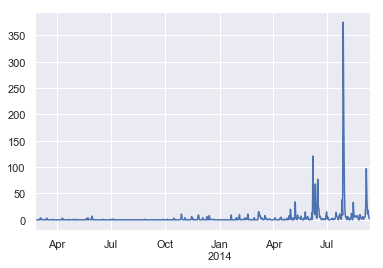

In [15]:
def time_series():
    """
    Visualize the Tweet creation time based on time-date information in the raw JSON Tweet file.

    Note: The processed CSV dataset file does not contain this information.

    :return: None.
    """
    plt.figure()
    pd.to_datetime(twitter_dataframe['created_at']).value_counts().resample('1D').sum().plot()
    plt.show()


# Call the function.
time_series()

<span style="font-family:Papyrus; font-size:1.25em;">

It appears that most of the Tweets were created around August 2014.<br>

</span>

### Re-Tweet Statistics:

Re-Tweet Statistics for JSON raw data:
False    2000
Name: retweeted, dtype: int64

Re-Tweet Statistics for CSV dataset:
True     441619
False    217363
Name: retweeted, dtype: int64

Re-Tweet Statistics for CSV dataset by Company:
Number of Tweets that are or aren't re-tweets by associated company: 
company     retweeted
adani       False        106946
            True         321505
bhp         False         40287
            True          29164
cuesta      False            63
                          ...  
santos      True          61604
whitehaven  False          6504
            True           8206
woodside    False          9937
            True           5560
Length: 22, dtype: int64

Proportion of Re-Tweets versus non Re-Tweets by associated company: 


<Figure size 432x288 with 0 Axes>

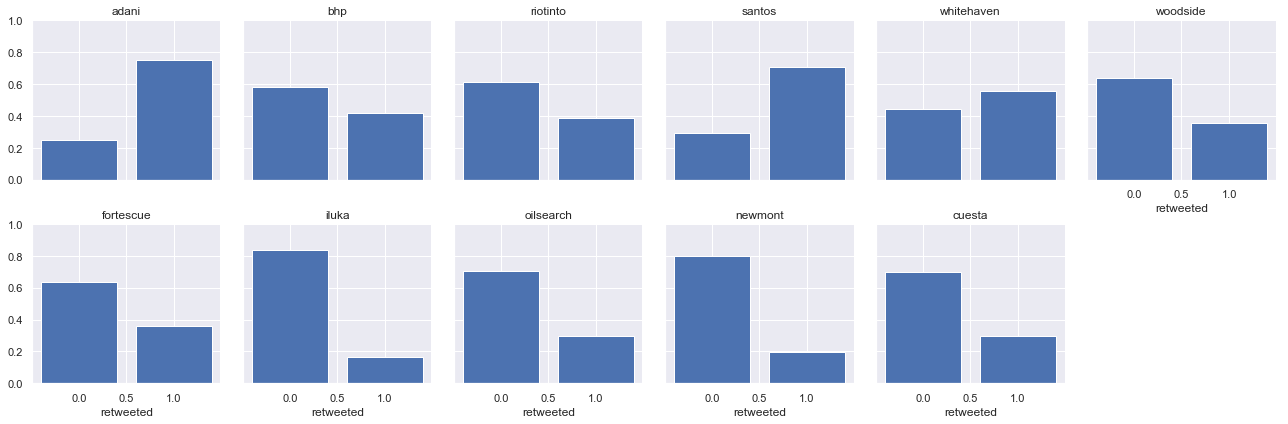

In [20]:
def retweeted():
    """
    Re-tweet statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    print("Re-Tweet Statistics for JSON raw data:")
    print(twitter_dataframe['retweeted'].value_counts())
    print()

    print("Re-Tweet Statistics for CSV dataset:")
    print(tweet_dataframe_processed['retweeted'].value_counts())
    print()

    print("Re-Tweet Statistics for CSV dataset by Company:")
    print("Number of Tweets that are or aren't re-tweets by associated company: ")
    print(tweet_dataframe_processed.groupby(['company', 'retweeted']).size())
    print()

    # Graph the Re-Tweet Statistics.
    print("Proportion of Re-Tweets versus non Re-Tweets by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe_processed[['retweeted', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1))
    grid.map_dataframe(bar_plot, 'retweeted').set_titles('{col_name}')
    plt.show()


# Call the function.
retweeted()

<span style="font-family:Papyrus; font-size:1.25em;">

This shows the number of Tweets that are or aren't re-tweets for both the raw JSON data and the CSV dataset.  We do not have associated company information for the raw JSON data so the graphs depict only the CSV dataset.  The graphs show the proportion of Tweets that are or are not re-tweets by the company the Tweets are associated with.<br>

0.0 = NOT a re-tweet.<br>
1.0 = IS a re-tweet.<br>

</span>

### User Statistics:

Proportion of most Tweets for unique users by associated company: 


<Figure size 432x288 with 0 Axes>

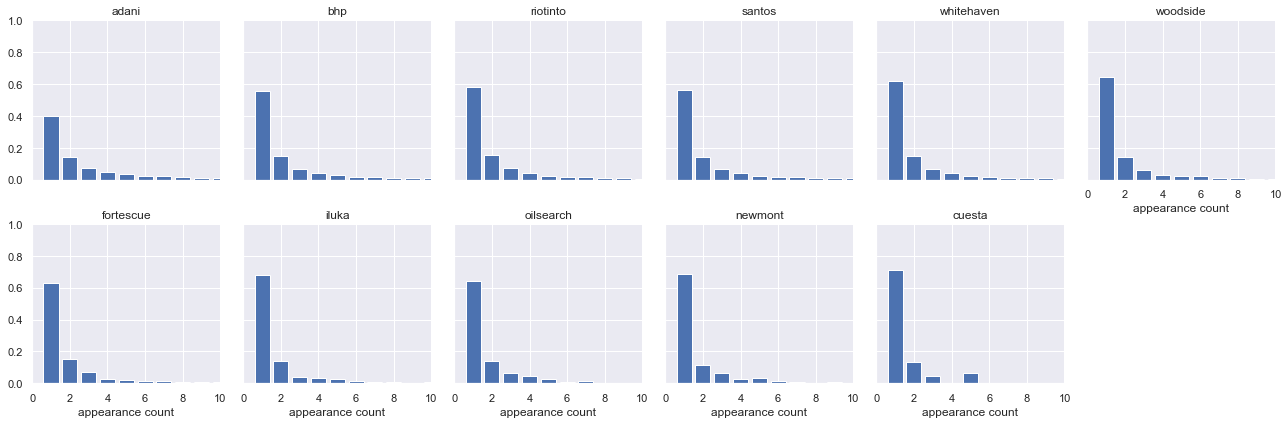

User Statistics for CSV dataset by Company: 
Top Tweet counts for unique user by associated company.
company                    
adani       WgarNews           0.015194269590
            GalileeBlockade    0.008992860327
            MarkPlackett1      0.007520113152
            SeanBradbery       0.007069653239
            garland_paige      0.006686879013
bhp         CommSec            0.026205526198
            aus_business       0.014744208147
            FinancialReview    0.013750701934
            icharttop          0.011720493585
            3novicesSydney     0.009186332810
cuesta      ABN_Newswire       0.144444444444
            proactive_au       0.133333333333
            MktTrader          0.055555555556
            sharecafetweets    0.055555555556
            ShareScene         0.055555555556
fortescue   FortescueNews      0.049781365624
            aus_business       0.016986209216
            FinancialReview    0.014547595022
            TweetingRoo        0.0123612512

In [26]:
def most_tweets_by_users():
    """
    User related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.

    :return: None.
    """

    # Graph the User Statistics.
    print("Proportion of most Tweets for unique users by associated company: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe_processed[['user_screen_name', 'company']], col='company', col_wrap=6,
                         ylim=(0, 1),
                         xlim=(0, 10))
    grid.map_dataframe(bar_plot_zipf, 'user_screen_name').set_titles('{col_name}').set_xlabels('appearance count')
    plt.show()

    # Adjusted parameters to allow statistics for all companies to show in output.
    pd.set_option("display.precision", 12)
    pd.options.display.max_rows = 100

    print("User Statistics for CSV dataset by Company: ")
    print("Top Tweet counts for unique user by associated company.")
    print(
        tweet_dataframe_processed[['company', 'user_screen_name']].groupby('company')
            .apply(lambda x: x['user_screen_name'].value_counts(normalize=True).head())
        # .value_counts(normalize=True)\
        # .sort_index(ascending=False).head())
    )
    print()


# Call the function.
most_tweets_by_users()

<span style="font-family:Papyrus; font-size:1.25em;">

The text output displays the top 5 unique users that account for the largest proportion of Tweets that are associated with a given company.<br>

The graph output shows that there are a few users that account for the majority of Tweets about a given company.  The graphs show proportions of Tweets in terms of percentages of all Tweets for that company.<br>

</span>

### Character Count Statistics:

Character Statistics for CSV dataset by Company: 
Character count relative frequency histogram: 


<Figure size 432x288 with 0 Axes>

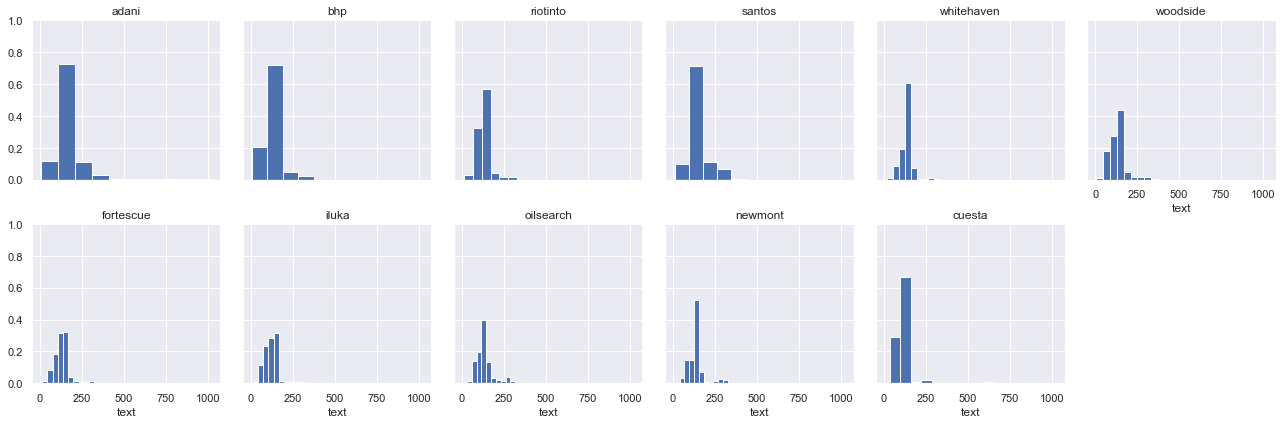

In [27]:
def character_counts():
    """
    Character related statistics and visualizations.

    Note: The raw JSON file does not have associated "company" information.
        
    :return: None.
    """

    def relhist_proc(col, **kwargs):
        """
        Helper function to visualize the data.

        :param col: the columns of the graph.
        :param kwargs: variable number of arguments.
        :return: None.
        """
        ax = plt.gca()
        data = kwargs.pop('data')
        proc = kwargs.pop('proc')
        processed = proc(data[col])
        # relative frequency histgram
        # https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram
        ax.hist(processed, weights=np.ones_like(processed) / processed.size, **kwargs)

    def char_len(tweets):
        """
        Determine the length of the Tweet text.

        :param tweets: the Tweet text.
        :return: the length of the Tweet.
        """
        return tweets.str.len()

    print("Character Statistics for CSV dataset by Company: ")
    print("Character count relative frequency histogram: ")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe_processed[['text', 'company']], col='company', col_wrap=6, ylim=(0, 1))
    grid.map_dataframe(relhist_proc, 'text', bins=10, proc=char_len).set_titles('{col_name}')
    plt.show()


# Call the function.
character_counts()

<span style="font-family:Papyrus; font-size:1.25em;">

TODO - understand what this is showing exactly.<br>

</span>

## Resources Used:

<span style="font-family:Papyrus; font-size:1.25em;">

Dataset Files (obtained from Borg supercomputer):<br>

dataset_slo_20100101-20180510.json<br>
dataset_20100101-20180510.csv<br>

Jupyter Notebook Files (obtained from SLO-classifiers GitHub Repository):<br>

"SLO analysis.ipynb"<br>

</span>

## TODO:

<span style="font-family:Papyrus; font-size:1.25em;">

Implement further elements from Shuntaro Yada's SLO Twitter Dataset Analysis.<br>

</span>